# Introdução a Clusterização e Classificação

Clusterização e Classificação são as aplicações mais comuns de aprendizado de máquina. Em Ciência de Dados estes modelos são usados para se entender melhor os dados existente e para fazer previsões sobre novos dados. Neste tutorial apresentamos exemplos simples de clusterização e classificação usando o pacote [Scikit-learn](https://scikit-learn.org/).

In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Lendo dados de um arquivo

O DataFrame carregado contém dados de apartamentos para alugar na cidade de Curitiba.

In [2]:
# lê o arquivo CSV
df = pd.read_csv('../data/aluguel.csv')

# mostra o conteúdo do DataFrame
df.head(3)

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17
2,6784,Rua Jose Loureiro,2,0,81,0,1100,400,23/08/17


## Clusterização (agrupamento)

Modelos de clusterização são usados para identificar grupos de observações com características similares em um dataset. Por exemplo, podemos tentar agrupar as ofertas de apartamentos em dois grupos de características similares. 

Incialmente vamos utilizar apenas os valores de área e aluguel para identificar os grupos. O gráfico abaixo mostra um scatter plot dos apartamentos de acordo com as variáveis escolhidas. Aparentemente há alguns agrupamentos de apartamentos, mas como temos poucos dados, é difícil tirar conclusões. 

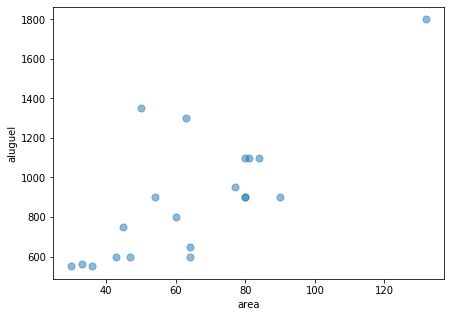

In [3]:
dfX = df[['area', 'aluguel']]

ax = dfX.plot.scatter(x='area', y='aluguel', s = 50, alpha = 0.5, figsize=(7,5))

Para fazer a identificação automática dos nossos grupos, vamos usar o algoritmo K-means. Este e muitos outros algoritmos de clusterização requerem que os dados sejam normalizados antes que a clusterização seja feita. O código abaixo faz esta normalização. Veja que agora os valores de área e aluguel estão sempre entre 0.0 e 1.0.

In [4]:
dfX_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfX), 
                  index = dfX.index, 
                  columns=dfX.columns)

dfX_norm

,area,aluguel
0,0.588235,0.280
1,0.333333,0.080
2,0.500000,0.440
3,0.196078,0.640
4,0.323529,0.600
5,0.490196,0.280
6,0.529412,0.440
7,0.000000,0.000
8,0.294118,0.200
9,1.000000,1.000


Abaixo aplicamos o algoritmo sobre nosso DataFrame. O algoritmo parece ter dividido os apartamentos entre pequenos/baratos e grandes/caros. Esta divisão em grupos em geral não é determinística e é responsabilidade do cientista de dados interpretar os resultados.

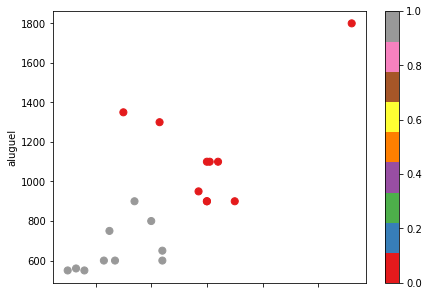

In [5]:
kmeans1 = KMeans(n_clusters = 2, random_state = 42) 
kmeans1.fit(dfX_norm) 
df['Agrupamento 1'] = kmeans1.labels_

dfX.plot.scatter(x='area', y='aluguel', s = 50, c = kmeans1.labels_, colormap='Set1', figsize=(7,5))

Podemos exibir nosso DataFrame agora com os valores calculados para o agrupamento. O algoritmo determinou o grupo 0 como sendo os apartamentos grandes/caros e o grupo 1 para os demais.

In [6]:
df.sort_values('Agrupamento 1')

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data,Agrupamento 1
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17,0
17,66490,Rua Desembargador Westphalen,1,0,80,1,1100,350,29/08/17,0
16,80,Rua Desembargador Westphalen,1,0,80,1,900,350,12/08/17,0
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17,0
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17,0
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17,0
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17,0
2,6784,Rua Jose Loureiro,2,0,81,0,1100,400,23/08/17,0
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17,0
19,44803,Rua Rockefeller,2,0,77,1,950,200,19/07/17,0


Fazer agrupamentos usando duas variáveis é conveniente porque simplifica a visualização. Porém, em geral, queremos fazer estes agrupamentos usando mais informações. Abaixo construímos um modelo com mais variáveis. Veja que os agrupamentos encontrados são parecidos. Em geral agrupamentos feitos com mais variáveis são mais confiáveis.

In [7]:
dfX = df[['area', 'quartos', 'vaga', 'condominio', 'aluguel']]

dfX_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfX), 
                  index = dfX.index, 
                  columns=dfX.columns)

kmeans2 = KMeans(n_clusters = 2, random_state = 42)  
kmeans2.fit(dfX_norm) 
df['Agrupamento 2'] = kmeans2.labels_

df.sort_values('Agrupamento 2')

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data,Agrupamento 1,Agrupamento 2
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17,0,0
18,2381,Rua Rockefeller,2,0,54,0,900,240,19/09/17,1,0
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17,0,0
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17,0,0
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17,0,0
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17,0,0
2,6784,Rua Jose Loureiro,2,0,81,0,1100,400,23/08/17,0,0
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17,1,0
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17,0,0
19,44803,Rua Rockefeller,2,0,77,1,950,200,19/07/17,0,0


## Classificação

Modelos de classificação aprendem as características que tendem a determinar a categoria (classe) de uma observação. Por exemplo, podemos escolher alguns apartamentos que nos sejam de interesse e usar um modelo de classificação que vai aprender as nossas preferências a partir dos apartamentos escolhidos. Após o aprendizado (treinamento), podemos usar o modelo para prever se vamos nos interessar ou não pelos demais apartamentos. 

Abaixo construímos um modelo de classificação baseado no algoritmo K-Neighbors.

In [8]:
# lê o arquivo CSV
df = pd.read_csv('../data/aluguel.csv')

# mostra o conteúdo do DataFrame
df.head()

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17
2,6784,Rua Jose Loureiro,2,0,81,0,1100,400,23/08/17
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17


Filtrando as variáveis (características) que vamos usar para o aprendizado.

In [9]:
df = df[['codigo', 'quartos', 'area', 'vaga', 'aluguel', 'condominio']].set_index('codigo')

df.head(3)

,quartos,area,vaga,aluguel,condominio
codigo,,,,,
34,2,90,0,900,371
167,2,64,0,650,428
6784,2,81,0,1100,400


Abaixo selecionamos os 10 primeiros apartamentos e definimos manualmente os que gostamos e não gostamos.

In [10]:
df_treino = df.head(10).copy()
df_treino['interesse'] = 'Não'
df_treino.loc[[167, 24, 469, 82],'interesse'] = 'Sim'

df_treino

,quartos,area,vaga,aluguel,condominio,interesse
codigo,,,,,,
34,2,90,0,900,371,Não
167,2,64,0,650,428,Sim
6784,2,81,0,1100,400,Não
82,2,50,0,1350,300,Sim
2970,2,63,0,1300,300,Não
34197,2,80,1,900,410,Não
5072,2,84,0,1100,382,Não
469,1,30,0,550,210,Sim
24,1,60,1,800,120,Sim


Agora separamos os 10 últimos apartamentos para que sejam classificados com o modelo que vamos construir.

In [11]:
df_teste = df.tail(10).copy()
df_teste

,quartos,area,vaga,aluguel,condominio
codigo,,,,,
9850,1,64,1,600,326
82343,1,45,0,750,420
20802,1,47,0,600,405
568,1,43,0,600,330
294579,1,36,0,550,350
59375,1,33,0,560,305
80,1,80,1,900,350
66490,1,80,1,1100,350
2381,2,54,0,900,240


Abaixo construímos o modelo e fazemos as predições para os apartamentos que não foram classificados manualmente. Para construir o modelo, usamos o DataFrame com os apartamentos que classificamos manualmente. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(
    df_treino[['quartos', 'area', 'vaga', 
               'aluguel', 'condominio']], df_treino['interesse']) 

df_teste['predições'] = neigh.predict(df_teste)
df_teste

,quartos,area,vaga,aluguel,condominio,predições
codigo,,,,,,
9850,1,64,1,600,326,Sim
82343,1,45,0,750,420,Não
20802,1,47,0,600,405,Sim
568,1,43,0,600,330,Sim
294579,1,36,0,550,350,Sim
59375,1,33,0,560,305,Sim
80,1,80,1,900,350,Não
66490,1,80,1,1100,350,Não
2381,2,54,0,900,240,Não
